In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

def normalise(df):
    return (df - df.min()) / (df.max() - df.min())

df = pd.read_csv("data/new_daily_cases.csv")
df = df.drop([0])
df = normalise(df)

X = np.column_stack((np.array(df['ConfirmedCovidCases']), np.array(df['HospitalisedCovidCases']), np.array(df['RequiringICUCovidCases'])))
#X = np.array(df['HospitalisedCovidCases']).reshape(-1, 1)
y = np.array(df['HealthcareWorkersCovidCases'])


### Cross-validation


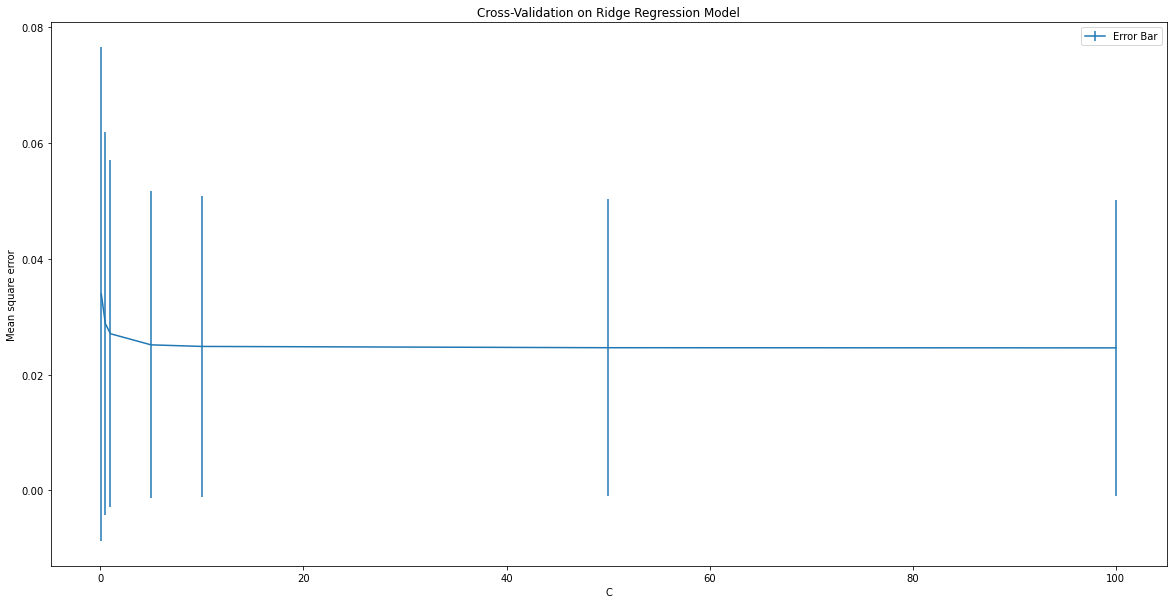

In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

def normalise(df):
    return (df - df.min()) / (df.max() - df.min())

df = pd.read_csv("data/new_daily_cases.csv")
df = df.drop([0])
df = normalise(df)

X = np.column_stack((np.array(df['ConfirmedCovidCases']), np.array(df['HospitalisedCovidCases']), np.array(df['RequiringICUCovidCases'])))
y = np.array(df['HealthcareWorkersCovidCases'])

mean_error = []; std_error = []
C_range = [0.1, 0.5, 1, 5, 10, 50, 100]
for C in C_range:
    model = Ridge(alpha = 1/(2 * C))
    temp = []
    kf = KFold(n_splits = 5)
    for train, test in kf.split(X):
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        temp.append(mean_squared_error(y[test], ypred))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
    
fig = plt.figure(figsize=(20, 10))
plt.errorbar(C_range,mean_error,yerr=std_error)
plt.title('Cross-Validation on Ridge Regression Model')
plt.xlabel('C'); plt.ylabel('Mean square error')
plt.legend(['Error Bar'])
plt.show()

#print("ridge mse:", mean_squared_error(y, ypred))

### Ridge Regression Model

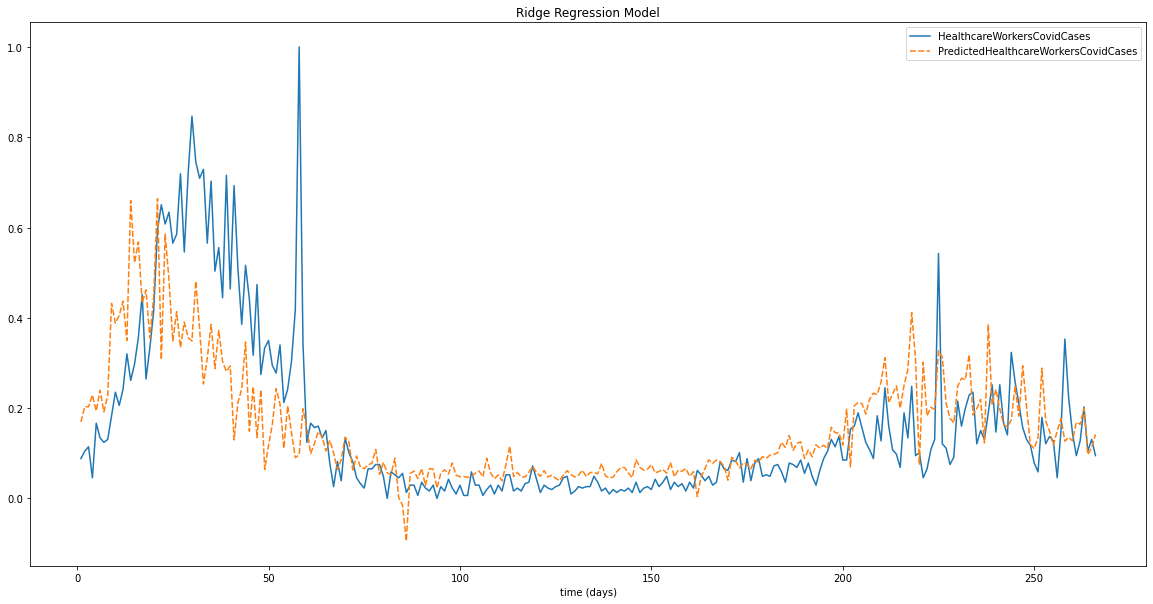

training data mse: 0.018412852668745563
test data mse: 0.01642910977823779


In [48]:
#C=10 looks best from error bar
C = 10
model2 = Ridge(alpha = 1/(2 * C))
model2.fit(X, y)

y_pred2 = model2.predict(X)

df_new2 = pd.DataFrame()
df_new2['HealthcareWorkersCovidCases'] = df['HealthcareWorkersCovidCases']
df_new2['PredictedHealthcareWorkersCovidCases'] = y_pred2

fig = plt.figure(figsize=(20, 10))
sns.lineplot(data=df_new2)
plt.title('Ridge Regression Model')
plt.legend()
plt.xlabel('time (days)')
plt.show()

print("training data mse:", mean_squared_error(y, y_pred2))

#print("\n split train and test data")
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)
C = 10
model2 = Ridge(alpha = 1/(2 * C))
model2.fit(Xtrain, ytrain)
y_pred3 = model2.predict(Xtest)

print("test data mse:", mean_squared_error(ytest, y_pred3))


### Baseline 


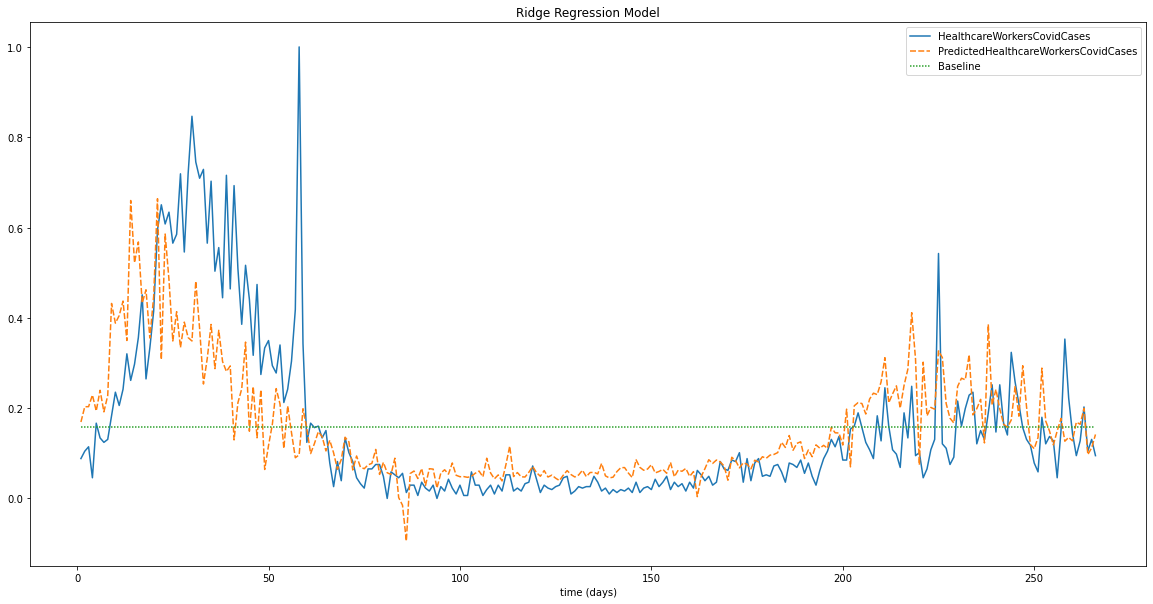


Baseline:
dummy mse: 0.034109272529946326
training data mse: 0.018412852668745563
test data mse: 0.011860204259274797


In [46]:
#C=10 looks best from error bar
C = 10
model2 = Ridge(alpha = 1/(2 * C))
model2.fit(X, y)

y_pred2 = model2.predict(X)

from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean")
dummy.fit(X, y)
ydummy = dummy.predict(X)

df_new2 = pd.DataFrame()
df_new2['HealthcareWorkersCovidCases'] = df['HealthcareWorkersCovidCases']
df_new2['PredictedHealthcareWorkersCovidCases'] = y_pred2
df_new2['Baseline'] = ydummy

fig = plt.figure(figsize=(20, 10))
sns.lineplot(data=df_new2)
plt.title('Ridge Regression Model')
plt.legend()
plt.xlabel('time (days)')
plt.show()

#baseline
print("\nBaseline:")

#from sklearn.model_selection import train_test_split
#Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

#y_pred = model2.predict(Xtest)

#from sklearn.dummy import DummyRegressor
#dummy = DummyRegressor(strategy="mean")
#dummy.fit(Xtrain, ytrain)
#ydummy = dummy.predict(Xtest)

#print("ridge mse:", mean_squared_error(y, y_pred2))
print("dummy mse:", mean_squared_error(y, ydummy))

print("training data mse:", mean_squared_error(y, y_pred2))

#print("\n split train and test data")
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)
C = 10
model2 = Ridge(alpha = 1/(2 * C))
model2.fit(Xtrain, ytrain)
y_pred3 = model2.predict(Xtest)

print("test data mse:", mean_squared_error(ytest, y_pred3))


### Using new case numbers from previous n days to predict healthcare worker cases. (n=7)

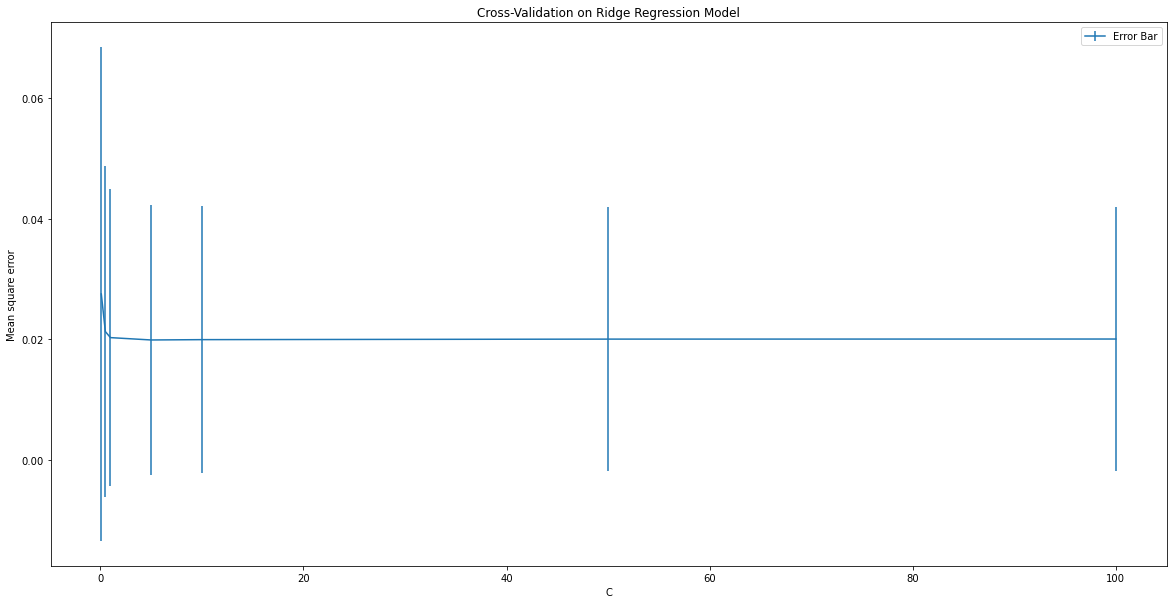

In [60]:
X2 = np.column_stack((X[:-7], X[1:-6], X[2:-5], X[3:-4], X[4:-3], X[5:-2], X[6:-1]))
y2 = y[7:]

mean_error = []; std_error = []
C_range = [0.1, 0.5, 1, 5, 10, 50, 100]
for C in C_range:
    model = Ridge(alpha = 1/(2 * C))
    temp = []
    kf = KFold(n_splits = 5)
    for train, test in kf.split(X2):
        model.fit(X2[train], y2[train])
        ypred2 = model.predict(X2[test])
        temp.append(mean_squared_error(y2[test], ypred2))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
fig = plt.figure(figsize=(20, 10))
plt.errorbar(C_range,mean_error,yerr=std_error)
plt.title('Cross-Validation on Ridge Regression Model')
plt.xlabel('C'); plt.ylabel('Mean square error')
plt.legend(['Error Bar'])
plt.show()

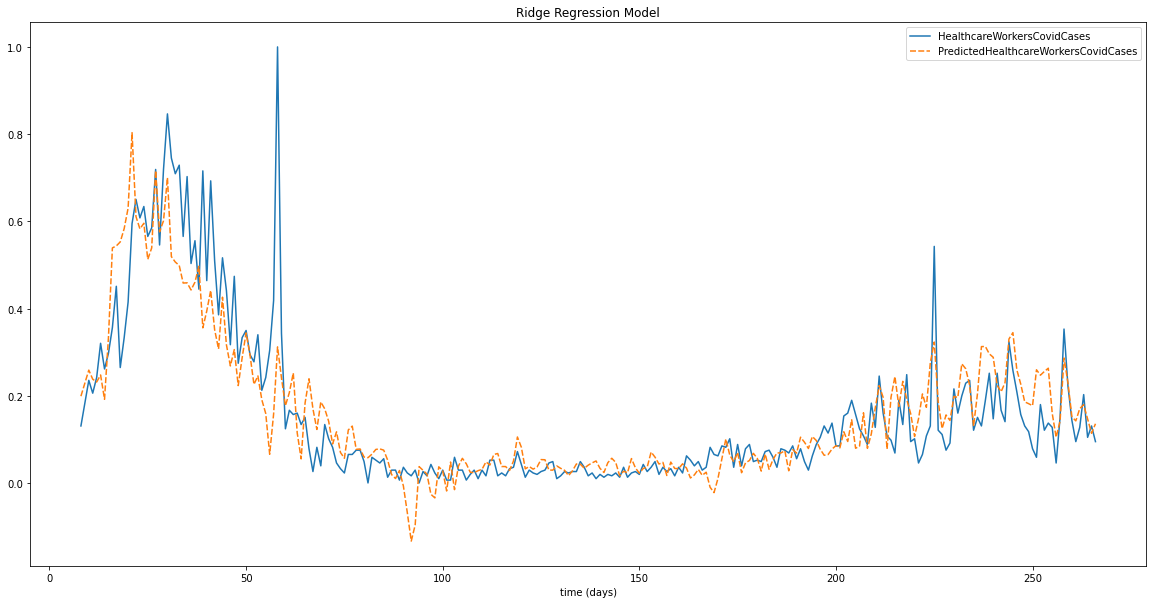

training data mse: 0.008389949501370038
test data mse: 0.006466771488599556


In [63]:
#C=10 looks best from error bar
C = 10
model2 = Ridge(alpha = 1/(2 * C))
model2.fit(X2, y2)

y_pred3 = model2.predict(X2)

df_new3 = pd.DataFrame()
df_new3['HealthcareWorkersCovidCases'] = df['HealthcareWorkersCovidCases'][7:]
df_new3['PredictedHealthcareWorkersCovidCases'] = y_pred3

fig = plt.figure(figsize=(20, 10))
sns.lineplot(data=df_new3)
plt.title('Ridge Regression Model')
plt.legend()
plt.xlabel('time (days)')
plt.show()

print("training data mse:", mean_squared_error(y2, y_pred3))

#print("\n split train and test data")
Xtrain, Xtest, ytrain, ytest = train_test_split(X2,y2,test_size=0.2)
C = 10
model2 = Ridge(alpha = 1/(2 * C))
model2.fit(Xtrain, ytrain)
y_pred3 = model2.predict(Xtest)

print("test data mse:", mean_squared_error(ytest, y_pred3))

### Baseline

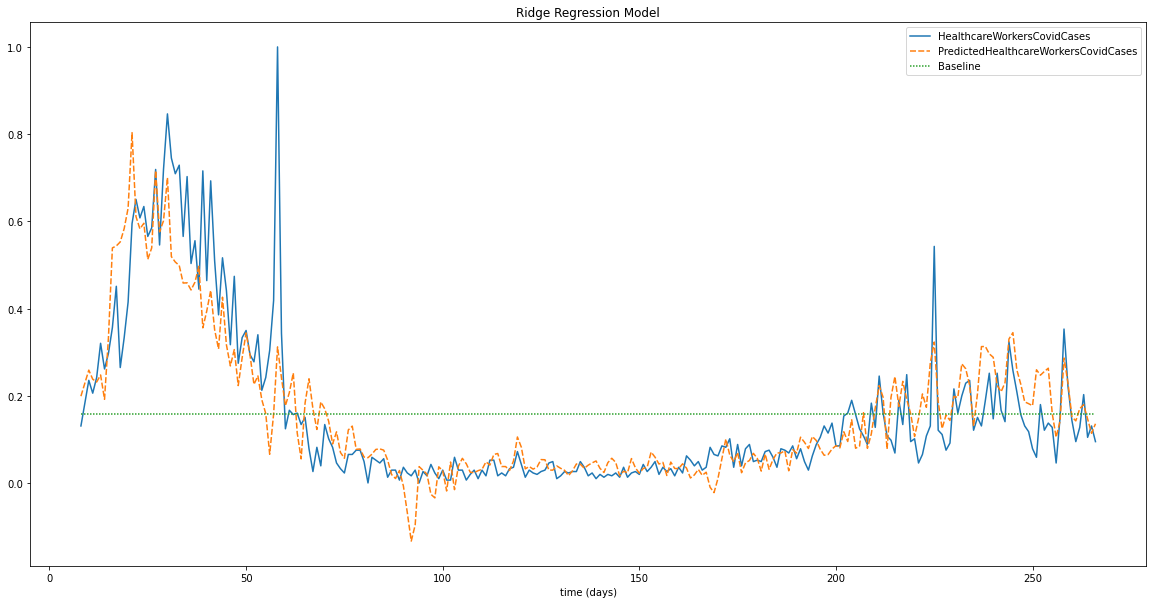


Baseline:
dummy mse: 0.034938659448240705
training data mse: 0.008389949501370038
test data mse: 0.01756936413319857


In [67]:
#C=10 looks best from error bar
C = 10
model2 = Ridge(alpha = 1/(2 * C))
model2.fit(X2, y2)

y_pred3 = model2.predict(X2)

from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean")
dummy.fit(X2, y2)
ydummy = dummy.predict(X2)

df_new3 = pd.DataFrame()
df_new3['HealthcareWorkersCovidCases'] = df['HealthcareWorkersCovidCases'][7:]
df_new3['PredictedHealthcareWorkersCovidCases'] = y_pred3
df_new3['Baseline'] = ydummy

fig = plt.figure(figsize=(20, 10))
sns.lineplot(data=df_new3)
plt.title('Ridge Regression Model')
plt.legend()
plt.xlabel('time (days)')
plt.show()

#baseline
print("\nBaseline:")

#from sklearn.model_selection import train_test_split
#Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

#y_pred = model2.predict(Xtest)

#from sklearn.dummy import DummyRegressor
#dummy = DummyRegressor(strategy="mean")
#dummy.fit(Xtrain, ytrain)
#ydummy = dummy.predict(Xtest)

#print("ridge mse:", mean_squared_error(y2, y_pred3))
print("dummy mse:", mean_squared_error(y2, ydummy))

print("training data mse:", mean_squared_error(y2, y_pred3))

#print("\n split train and test data")
Xtrain, Xtest, ytrain, ytest = train_test_split(X2,y2,test_size=0.2)
C = 10
model2 = Ridge(alpha = 1/(2 * C))
model2.fit(Xtrain, ytrain)
y_pred3 = model2.predict(Xtest)

print("test data mse:", mean_squared_error(ytest, y_pred3))